In [2]:
import scipy
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pybedtools
import os
from scipy import stats
import gc
import matplotlib as mpl
import glob
import  statsmodels.stats.multitest

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
## Mutant upregulated genes
mut_up=['PCNA','MDR-1','E2F-5','NFKB2','GLNRS','SRM','PARP1','MCM6','CCNB2','CD44','DRG1','CDC25A','EBAG9','MYBL2','ITGA6','POLA1','MAPKAPK3','PKP2','CD9','S1PR1','PSEN1','L1CAM','ITGB4','COL14A1','CLDN3','LGALS7','NFASC','ABLIM1','ACTA2','ADAMTSL4','ADPRTL2','AGGF1','AKT2','ALDH1A3','ALDH2','ALDH3A1','ANGPT1','APS','AR','ARHGEF2','ARID3B','ARNT2','ASB13','ATF3','ATIC','BAG2','BARD1','BCAN','BMP6','BPTF','BTG3','BTN3A3','C10orf116','C13orf1','C16orf45','C1orf63','C21orf63','CA2','CA9','CARS','CBR4','CCNB1IP1','CCNB2','CCNH','CCNL1','CD14','CD44','CDC2','CDC6','CDH1','CDKL3','CDS1','CEBPB','CKS1B','CLEC18C','CLMN','CPT1B','CPVL','CREB1','CTPS','CTSF','CUL5','CUL7','DAAM1','DCAF4','DHFRL1','DHRS9','DICER1','DMXL1','DRG1','E2F3','E2F5','EBAG9','EFHA1','EXPH5','F2R','FADS1','FAM169A','FBXO31','FDFT1','FECH','FTH1','FZD3','GAGE3','GAPVD1','GARS','GHDC','GINS1','GLI2','GMIP','GNB2L1','GOSR1','GPR153','GTF3A','GUCY1A3','HAS3','HAX1','HBA2','HHL','HIBCH','HIST1H4C','HMGB2','HOMER1','HOMER2','HSP90AB1','HYAL3','ID1','ID3','IL1RL1','IMPDH2','INADL','INF2','INPPL1','ITGA6','ITPR3','JUNB','JUP','KIAA0516','KIF13B','KIF24','KIF2C','KLF16','KPNA2','KRAS','KRT16','LARP','LOC115871','LOC120450','LOC139376','LOC81691','LPHN2','LPP','LRRFIP1','LRRK1','LYN','MAD2L1','MAL2','MAP2K5','MAP4','MAPKAPK2','MAPKAPK3','MAPKAPK4','MARCH_6','MARCKS','MAZ','MCL1','MCM3','MCM6','ME1','MED13','MEF2D','MELK','MEST','MFGE8','MINK','MMP28','MNX1','MOCOS','MRPL46','MRPS6','MTAP','MYC','MYO5B','NAP1L1','NARS','NBEA','NDC80','NDUFA4L2','NFATC2IP','NFKBIA','NKTR','NLRX1','NMI','NPC1','NUP153','PAQR3','PARD6B','PARP1','PCGF2','PDE3B','PDLIM5','PGAP3','PGM1','PHKB','PI3','PIAS2','PIK3CA','PLEKHH1','POLA2','POLD2','POLR2E','PRDM15','PRKCI','ProSAPiP1','PRPF40A','PRSS7','PRSS8','PVRL3','PYGL','QARS','RAD51C','RBBP6','RBBP8','RHOBTB2','RHOG','RLN1','RNF44','RNF6','RP3-402G11.5','RPGRIP1','RPS6KA3','RRM1','SARNP','SEC31A','SEZ6L2','SF3A2','SFPQ','SGPP2','SIRT6','SLC16A4','SLC26A2','SLC29A2','SLC4A7','SLC6A8','SLCO4A1','SLPI','SMA4','SMTN','SNTB2','SPAG5','SQSTM1','SRM','SS18','STAMBP','STAT3','STATH','TAF1A','TARS','TFAP2A','TMC6','TNFRSF9','TRAF3IP2','TREM1','TRIM29','TROVE2','TUBB','TUSC3','TXNIP','TXNL4A','UCN','UGT1A10','UGT2B28','UGT2B7','UPF1','VIM','XRCC5','YARS','ZBTB45','ZNF217','ZNF238','ZNF24','ZNF273','ZNF415','ZNF44','ZNF579','ZNF580','ZNF652']
### Mutant downregulated genes
mut_down=['MLL2','MLL1','ABAT','ABCA12','ABCG1','ABHD15','ABHD4','ABHD6','ABTB2','ACPP','AHSA2','AIFM2','AK1','AKR1B10','ALDH7A1','AMACR','ANK1','ANO4','APAF1','APOBEC3C','ARAP1','ARG1','ARHGAP6','ARHGEF3','ASPA','ATP11B','BCHE','BCL11B','BDKRB1','BDNF','BLNK','BTF3L3','BTG2','C13orf31','C15orf41','C16orf5','C17orf103','C19orf59','C1orf187','C2orf3','C4A','C4orf18','C5orf4','C6orf204','C7orf10','C7orf57','C9orf100','C9orf98','CABC1','CABYR','CACNA2D2','CALML3','CAPN1','CARD18','CASP6','CBFA2T3','CCNA1','CCT6B','CDH10','CDKN1A','CDKN1C','CEACAM1','CES2','CLCA2','CLDN19','CNNM4','COBL','COL18A1','COL2A1','CPE','CPN2','CRISPLD2','CRYAB','CSNK1G1','CST1','CST11','CTSH','CYFIP2','CYLC1','CYP2C9','CYP2S1','CYP3A7','D4S234E','DDB2','DDC','DFNB31','DGKZ','DHRS2','DISP1','DKK2','DMRTC1','DNAJC18','DNAJC21','DPYSL4','DSG3','DUOX1','DUSP13','EDAR','EDNRB','EFS','EGR2','ENC1','EPB49','EPHB4','EPPK1','ETNK1','ETV7','F2RL2','FAM105A','FAM134B','FAM13C','FAM43A','FAM46C','FAM69B','FAM82A1','FAM87A','FBXO2','FBXO22','FGF1','FITM2','FLJ14312','FLJ32065','FLJ36336','FLJ40773','FLNC','FMN1','FREQ','FRMD8','FXYD2','G6PC','GABARAPL1','GAD1','GADD45A','GAGEB1','GALE','GAMT','GATA3','GCH1','GCLC','GDAP1L1','GDF15','GDF9','GGT1','GGT6','GH2','GHR','GJC1','GLS','GLS2','GM2A','GNA11','GNA14','GNG2','GPC1','GPR126','GPR137B','GPR155','GPR56','GPR87','GRAMD2','GREB1','GRN','GTPBP2','H19','HAGH','HES2','HHATL','HIC2','HIST1H2AE','HLA-DMB','HOXC13','HOXD10','HSDL2','HSPA5BP1','HTR2A','IDUA','IFIT3','IFITM1','IL24','IL2RB','INPP1','INPP5D','ISG15','ISYNA1','ITFG1','KAT2B','KCNB1','KCNC4','KCNJ12','KIAA0247','KIAA0284','KIAA1026','KIAA1052','KIAA1199','KIAA1211','KIAA1324','KIAA1751','KITLG','KLRK1','KREMEN2','KRT78','KRTAP2-1','KSR','LAMP3','LCE1B','LDLRAP1','LHX3','LIN54','LOC132671','LOC203274','LOC283585','LOC284837','LOC286434','LOC348938','LOC80154','LRDD','LRP10','LTB4R','LUM','MAB21L1','MAD1L1','MAEL','MAFB','MAGEA4','MAP2K3','MAPK13','MARVELD2','MCC','MDFIC','MDM2','MEF2A','MGC16703','MGC4248','MIB2','MICALL2','MIR','MLF2','MME','MPZL2','MRAS','MRPL44','MSX1','MT1G','MTMR6','MYO6','MYO7A','NADSYN1','NCRNA00085','NEFL','NHLH2','NIFU','NLRP1','NOTCH1','NOTCH3','NRCAM','NRP2','OIP106','OTP','P9','PADI3','PAK6','PALMD','PARD6G','PARP10','PARP14','PCBP4','PCLO','PDE3A','PDE4C','PDE4D','PENK','PERP','PF4V1','PGF','PLA2G2A','PLAC8','PLAT','PLEK','PLXNB3','PMAIP1','PODXL','POLH','POMZP3','POU3F1','PPM1F','PPP2R2B','PPP2R2C','PRKX','PRKY','PRRX1','PSA','PSEN2','PSTPIP2','PTGES','PTPN22','PVRL4','PYHIN1','RALGDS','RASAL1','RASGEF1B','RASSF6','RDH10','RET','retII','RGS12','RHOD','RNASE7','RNF128','RNF144B','RNF4','RPL36','RPS27L','RPS6KA1','RRM2B','RTN1','SAA2','SAC3D1','SCN3B','SCNN1G','SEC14L5','SERPINB5','SESN1','SHC4','SHROOM2','SI','SLC2A13','SLC2A8','SLC2A9','SLC35D1','SLC35E4','SLC39A8','SLC4A11','SLC4A4','SLC9A1','SLC9A3R1','SLCO2B1','SMARCD3','SOM','SORBS1','SORL1','SPAG1','SPN','SSB2','STAR','STARD5','STAT4','STOX2','SULF2','SYK','SYNC','SYTL2','TAF3','TAGLN','TAP1','TBXA2R','TEAD3','TFAP2E','TGFBR1','TINAGL1','TINP1','TLR3','TM7SF3','TMEM144','TMEM27','TMEM63B','TMG4','TMTC3','TNFRSF10B','TNFRSF14','TNP2','TNRC6C','TP53I11','TP53I3','TP53INP1','TP53TG1','TP73','TRAF4','TREM2','TRIM11','TRIM2','TRIM22','TRIM3','TSGA10','TSPAN14','TSPY1','ULBP2','VCAN','VSNL1','WDR8','WFDC5','WNT5A','WWP1','XLalphas','YPEL3','ZBTB1','ZMAT3','ZNF197','ZNF236','ZNF385A','ZNF441','ZNF492','ZNF746','ZNF786']
## wild targets
wild=['CDKN1A','RRM2B','MDM2','SUSD6','GDF15','BTG2','DDB2','GADD45A','PLK3','TIGAR','RPS27L','TNFRSF10B','TRIAP1','ZMAT3','BAX','PGF','POLH','PPM1D','SULF2','XPC','AEN','BLOC1S2','FAS','GPR87','NINJ1','PLK2','PSTPIP2','SESN1','TP53I3','TP53INP1','ABCA12','ANKRA2','CCNG1','CYFIP2','DRAM1','FBXO22','ISCU','PHLDA3','SERPINB5','SERTAD1','TRAF4','TRIM22','CES2','CMBL','FBXW7','HSPA4L','KITLG','SLC12A4','ATF3','BBC3','CCDC90B','DYRK3','EDA2R','EPHA2','FAM13C','FAM198B','FAM212B','FDXR','LIF','NADSYN1','NTPCR','ORAI3','PRKAB1','PTP4A1','SESN2','SLC30A1','SPATA18','TGFA','TLR3','TM7SF3','TMEM68','WDR63','ZNF561','ZNF79','ASCC3','ACER2','ANXA4','APOBEC3C','ASTN2','CD82','CDIP1','CPE','CSF1','DCP1B','ENC1','FOSL1','FUCA1','IER5','PADI4','PANK1','PGPEP1','PLCL2','PMAIP1','PRDM1','RAP2B','RRAD','ZNF219','ZNF337','ACTA2','EDN2','ALOX5','ARHGEF3','CERS5','DDR1','DHRS3','DUSP14','E2F7','EPS8L2','FAM210B','GLS2','GPX1','GRHL3','HHAT','IGDCC4','IKBIP','LAPTM5','MAST4','MICALL1','NOTCH1','RABGGTA','RNF19B','SAC3D1','SYTL1','TNFRSF10A','TNFRSF10D','TSPAN11','VWCE','DDIT4','RAD51C','SERPINE1','TNFAIP8','TSKU','PCNA','ACYP2','APAF1','APOBEC3H','BCL2L1','BCL6','BLCAP','C17orf82','COL7A1','CPEB4','CSNK1G1','DGKA','FAM49A','FAM84B','GNAI1','INPP1','ITGA3','KRT15','LCE1E','LIMK2','LRP1','MCC','NUPR1','PARD6G','PHPT1','PIDD1','PML','PTPRE','PVRL4','RETSAT','REV3L','RNASE7','SFN','TNFRSF10C','TRIML2','VCAN','ADCK3','AK3','ALDH1A3','BBS2','BTG1','CEL','CLCA2','CLDN1','CLP1','CROT','CYP4F3','DAPK1','EPN3','FBXO32','FHL2','HES2','KCNN4','KLHDC7A','LMNA','MLF2','MR1','MYO6','NEFL','NKAIN4','PCLO','PDE4C','PGAP1','PLCXD2','PLEKHF1','PLTP','PLXNB1','PLXNB2','PRKAB2','PRKX','PRODH','PTPRU','RGMA','RGS16','RND3','RNF144B','S100A2','SCN2A','SCN4B','SCRIB','SEMA3B','SLC25A45','SLC44A5','SLC4A11','SLC9A1','STAT3','STK17A','STX6','TP73','TRIM32','TRIM38','TRIM5','TYMSOS','AKAP9','CCDC51','CDH8','DUSP11','GCC2','METTL8','PPP1R3C','STEAP3','ABHD4','ABTB2','ADGRG1','AIFM2','AMOTL1','AMZ2','ARC','ARVCF','BHLHE40','BMP7','BORCS7','BTBD10','BTG3','C17orf89','CAPN2','CASP6','CATSPERG','CAV1','CCNK','CFLAR','CGB7','CHST14','COBLL1','CPEB2','CPSF4','DNAJB2','DOCK8','DUSP5','DUSP7','EBI3','EFNB1','EI24','EML2','ENPP2','ETV7','FAM196A','FAM98C','FCHO2','FCHSD2','FLRT2','GBE1','GPC1','HES1','HRAS','HSD17B3','ICOSLG','IGFBP7','IL1B','ISYNA1','JAG1','KRT8','KSR1','LACC1','LPXN','LRPAP1','MFAP3L','MKNK2','MON2','MRPL49','MYBPHL','MYLK','MYOF','NFKBIA','NHLH2','NLRP1','NYNRIN','P3H2','PANK2','PAQR7','PCBP4','PERP','PLLP','POU3F1','PPFIBP1','PPM1J','PPP4R3A','PTAFR','RALGDS','RBM38','RGL1','RGS20','RHOC','RPS19','SARS','SCIN','SCN3B','SDC4','SDPR','SMAD3','SNX2','SOCS4','TAB3','TCAIM','TEP1','TET2','TEX9','TMEM63B','TMEM8B','TP53','TP53I11','TRAK1','TRIP6','TSGA10','UNC5B','UQCC1','VDR','YPEL3','ZNF195','ZNF385A','ZNF488']
## downloaded from https://www.cancergenomeinterpreter.org/genes
cancer=pd.read_csv("data/cancer_genes_upon_mutations_or_CNAs.tsv",sep='\t')
cancer=cancer['gene'].unique()

In [6]:
ant_col=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf']
ant_p=dict({"intron": '#e41a1c',"Intergenic":'#377eb8',"promoter-TSS":'#4daf4a',"exon":'#984ea3',"3' UTR":'#ff7f00',"non-coding":'#ffff33',"TTS":'#a65628',"5' UTR":'#f781bf','None':'#666666'})
cols=['#f6eff7','#d0d1e6','#a6bddb','#67a9cf','#3690c0','#02818a','#016450']

In [7]:
pts = np.linspace(0, np.pi * 2, 20)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

## Identification of differential chromatin accessibility in gain-of-function mutant p53 tumours

### Differentially Accessible Peaks 

In [9]:
### Load the result file from Differential_Acc_limma.R ####

brca_limma=pd.read_csv("Results/BRCA_WM_results.tsv",sep="\t")
brca_limma.columns=['log2FoldChange','AveExpr','t','pvalue','padj','B']
brca_limma_gain=brca_limma[(brca_limma['log2FoldChange']>1)& (brca_limma['padj']<0.1)].index
print("Gained:",len(brca_limma_gain))
brca_limma_loss=brca_limma[(brca_limma['log2FoldChange']< -1)& (brca_limma['padj']<0.1)].index
print("Lost:",len(brca_limma_loss))

Gained: 984
Lost: 1587


### HOMER: linked genes, Genemoic region, Gene_type 


In [10]:
### brca result hommer: Use annotate.pl from HOMER on brca_limma genomic cordinates ####
brca_de_homer=pd.read_csv("data/HOMER_BRCA.tsv",sep='\t')
brca_de_homer['Annotation']=brca_de_homer['Annotation'].str.split("(",1,expand=True)[0]
brca_limma=brca_limma.merge(brca_de_homer[['name','Annotation','Gene Name','Gene Type']],left_index=True,right_on='name',how='left')
brca_limma.index=brca_limma["name"]
brca_limma.drop("name",axis=1,inplace=True)
brca_limma.index.name=None
brca_limma['Type-gene']='Other'
brca_limma['Type-gene'][(brca_limma['Gene Name'].isin(cancer))&(brca_limma['Annotation']!="None")]="Cancer"
brca_limma['Type-gene'][(brca_limma['Gene Name'].isin(mut_up))&(brca_limma['Annotation']!="None")]="Known Up"
brca_limma['Type-gene'][(brca_limma['Gene Name'].isin(mut_down))&(brca_limma['Annotation']!="None")]="Known Down"
brca_de_homer.columns=['name', 'Chr', 'Start', 'End','Strand', 'Peak Score', 'Focus Ratio/Region Size', 'Annotation','Detailed Annotation', 'Distance to TSS', 'Nearest PromoterID','Entrez ID', 'Nearest Unigene', 'Nearest Refseq', 'Nearest Ensembl', 'Gene Name', 'Gene Alias', 'Gene Description', 'Gene Type']


In [11]:
### Prepare data for Volcano plot###
plot_data=brca_limma[~brca_limma['Annotation'].isna()]
plot_data['-log10(padj)']=-np.log10(plot_data['padj'])
plot_data['Annotation'][(plot_data['log2FoldChange']<1)&(plot_data['log2FoldChange']> -1)]="None"
plot_data['Annotation'][(plot_data['padj'])>0.1]="None"
plot_data.Annotation = plot_data.Annotation.str.strip()
plot_data['Type-gene']=''
plot_data['Type-gene'][(plot_data['Gene Name'].isin(cancer))&(plot_data['Annotation']!="None")]="Cancer"

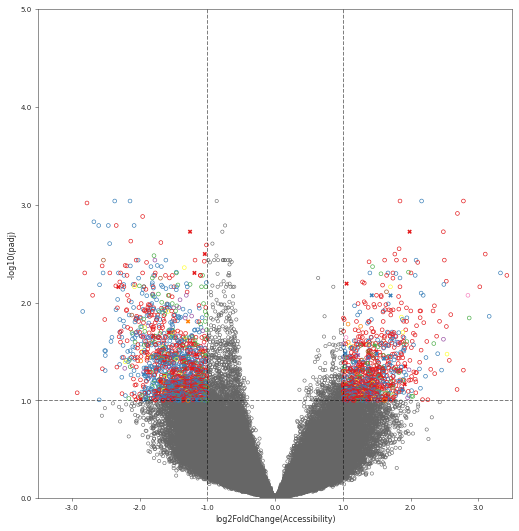

In [30]:
### Figure1 Volcano plot of Differentially Acc result###
sns.set(font="Arial")
sns.set(style="ticks", rc={"axes.linewidth": 0.5})
fig, ax = plt.subplots(figsize=(8.5, 9))
grid=sns.scatterplot(x="log2FoldChange", y="-log10(padj)", hue='Annotation',data=plot_data[plot_data['Annotation']=='None'], palette=ant_p,style="Type-gene" ,markers=[open_circle],alpha=1,linewidth=0,ax=ax,s=15,hue_order = ['promoter-TSS',"5' UTR",'exon','intron','TTS',"3' UTR",'Intergenic','non-coding']).set_title("",size=8,)
grid=sns.scatterplot(x="log2FoldChange", y="-log10(padj)", hue='Annotation',data=plot_data[plot_data['Annotation']!='None'], palette=ant_p,style="Type-gene" ,markers=[open_circle,"X"],alpha=1,linewidth=0,ax=ax,s=20,hue_order = ['promoter-TSS',"5' UTR",'exon','intron','TTS',"3' UTR",'Intergenic','non-coding']).set_title("",size=8,)
plt.plot([-1, -1], [5, 0], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
plt.plot([1, 1], [5, 0], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
plt.plot([-3.5, 3.5], [1, 1], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles=handles[1:], labels=labels[1:],loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, ncol=5,borderaxespad=0.)
ax.get_legend().remove()
ax.set(xlim=(-3.5, 3.5))
ax.set(ylim=(0, 5))
ax.set_ylabel("-log10(padj)",size = 8)
ax.set_xlabel("log2FoldChange(Accessibility)",size = 8)
ax.set_yticklabels(ax.get_yticks(), size = 7)
ax.set_xticklabels(ax.get_xticks(), size = 7)
ax.xaxis.set_tick_params(width=0.5,size=3)
ax.yaxis.set_tick_params(width=0.5,size=3)
plt.savefig("plots/Figure1A.png",bbox_inches='tight',format="png",dpi=500.0)

Gained peaks distribution


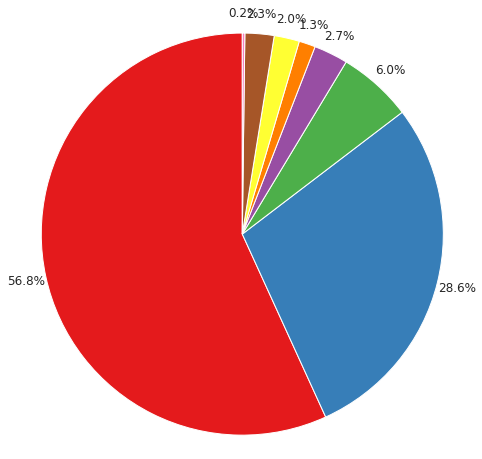

Lost peaks distribution


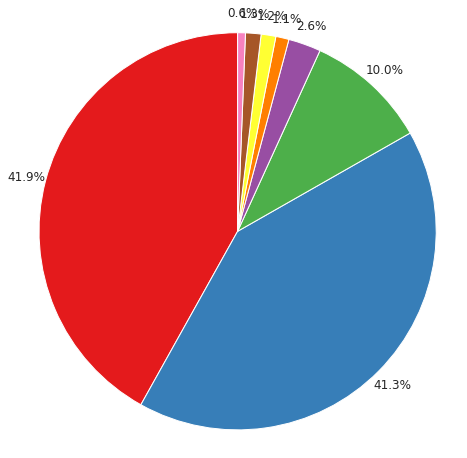

In [28]:
### Distribution of Genomic regions in the significant peaks ###
l=['intron', 'Intergenic', 'promoter-TSS', 'exon', "3' UTR", 'non-coding', 'TTS', "5' UTR"]
v=[559, 281, 59, 27, 13, 20, 23, 2]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(v, labels=l,startangle=90,colors=ant_col,autopct='%1.1f%%',pctdistance=1.1,labeldistance=None)
ax1.axis('equal')
plt.savefig("plots/Figure1A_pie_gain.png",bbox_inches='tight',format="png")
print("Gained peaks distribution")
plt.show()
l=['intron', 'Intergenic', 'promoter-TSS', 'exon', "3' UTR", 'non-coding', 'TTS', "5' UTR"]
v=[665, 656, 158, 42, 17, 19, 20, 10]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(v, labels=l,startangle=90,colors=ant_col,autopct='%1.1f%%',pctdistance=1.1,labeldistance=None)
ax1.axis('equal')
plt.savefig("plots/Figure1A_pie_loss.png",bbox_inches='tight',format="svg")
print("Lost peaks distribution")
plt.show()

###  Distance to nearest peak 

In [97]:
### Find the next closest peak to the significant peaks ###

# BRCA GAIN ----> 

bed=pd.DataFrame()
bed['Regions']=brca_limma_gain
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['start']=temp['start'].astype(int)
temp['id']=brca_limma_gain
temp=temp.sort_values(['chr','start'],ascending=True)
bed=pd.DataFrame()
bed['Regions']=brca_limma[~brca_limma.index.isin(brca_limma_gain)].index
temp2=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp2.columns=['chr','start','stop']
temp2['start']=temp2['start'].astype(int)
temp2['id']=brca_limma[~brca_limma.index.isin(brca_limma_gain)].index
temp2=temp2.sort_values(['chr','start'],ascending=True)
a=pybedtools.BedTool.from_dataframe(temp)
b=pybedtools.BedTool.from_dataframe(temp2)
b_gain = a.closest(b,d=True,io=True)
b_gain=pybedtools.BedTool.to_dataframe(b_gain)
b_gain.sort_values('itemRgb',ascending=True,inplace=True)
bins=[0,  1000, 2000,  5000,  10000,  15000,30000,180000]
b_gain['bin']=pd.cut(b_gain['itemRgb'], bins=bins)
b_gain=b_gain.merge(brca_de_homer[['name','Annotation']],on='name',how='left')
b_gain['bin']=b_gain['bin'].astype(str)

# BRCA LOSS ----> 
bed=pd.DataFrame()
bed['Regions']=brca_limma_loss
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['start']=temp['start'].astype(int)
temp['id']=brca_limma_loss
temp=temp.sort_values(['chr','start'],ascending=True)
bed=pd.DataFrame()
bed['Regions']=brca_limma[~brca_limma.index.isin(brca_limma_loss)].index
temp2=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp2.columns=['chr','start','stop']
temp2['start']=temp2['start'].astype(int)
temp2['id']=brca_limma[~brca_limma.index.isin(brca_limma_loss)].index
temp2=temp2.sort_values(['chr','start'],ascending=True)
a=pybedtools.BedTool.from_dataframe(temp)
b=pybedtools.BedTool.from_dataframe(temp2)
b_loss = a.closest(b,d=True,io=True)
b_loss=pybedtools.BedTool.to_dataframe(b_loss)
b_loss.sort_values('itemRgb',ascending=True,inplace=True)
bins=[0,  1000, 2000,  5000,  10000,  15000,  30000,900000]
b_loss['bin']=pd.cut(b_loss['itemRgb'], bins=bins)
b_loss=b_loss.merge(brca_de_homer[['name','Annotation']],on='name',how='left')
b_loss['bin']=b_loss['bin'].astype(str)

br_dis=pd.concat([b_gain,b_loss])

br_dis['Cancer']='BRCA'
dis=br_dis
dis.columns=['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart','thickEnd', 'Distance', 'Distance_range', 'Annotation', 'Cancer']


In [32]:
brca_limma['Cancer']='BRCA'
sig_limma=brca_limma[((brca_limma['log2FoldChange']>1)|(brca_limma['log2FoldChange']< -1)) &(brca_limma['padj']<0.1)]
sig_limma['name']=sig_limma.index

In [98]:
### Prepare data for Figure2: Closest peaks plot ###

gain_st_brca=pd.DataFrame(index=b_gain['bin'].unique(),columns=b_gain['Annotation'].unique())
for i in gain_st_brca.index:
    for c in gain_st_brca.columns:
        l=len(b_gain[(b_gain['bin']==i)&(b_gain['Annotation']==c)])
        gain_st_brca.loc[i,c]=l
gain_st_brca.index=['1kb','2kb',"5kb","10kb",'15kb',"30kb",">30kb"]
gain_st_brca=gain_st_brca[['intron ', 'Intergenic', 'promoter-TSS ', 'exon ', "3' UTR ",
       'non-coding ', 'TTS ', "5' UTR "]]


loss_st_brca=pd.DataFrame(index=b_loss['bin'].unique(),columns=b_loss['Annotation'].unique())

for i in loss_st_brca.index:
    for c in loss_st_brca.columns:
        l=len(b_loss[(b_loss['bin']==i)&(b_loss['Annotation']==c)])
        loss_st_brca.loc[i,c]=l
loss_st_brca.index=['1kb','2kb',"5kb","10kb",'15kb',"30kb","90kb"]
loss_st_brca=loss_st_brca[['intron ', 'Intergenic', 'promoter-TSS ', 'exon ', "3' UTR ",
       'non-coding ', 'TTS ', "5' UTR "]]


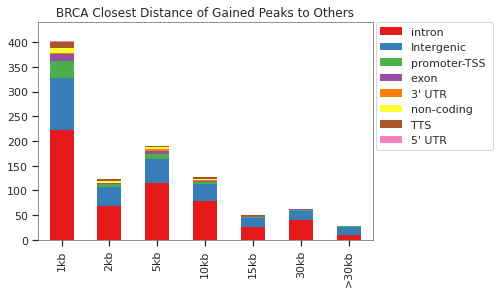

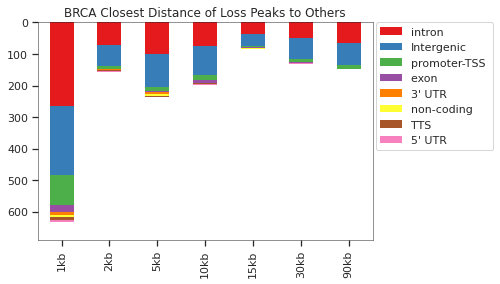

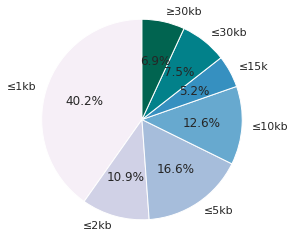

In [99]:
###  Figure2: Closest peaks plot ###
sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots()
gain_st_brca.set_index(gain_st_brca.index).plot(kind='bar', linewidth=0,stacked=True, color=ant_col,ax=ax).set_title('BRCA Closest Distance of Gained Peaks to Others')
plt.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.,fancybox=True, ncol=1)
ax.set(ylim=(0, 440))
plt.savefig("plots/Figure1C_gain.png",bbox_inches='tight',format="png")

sns.set_style("white")
sns.set_style("ticks")
fig, ax = plt.subplots()
loss_st_brca.set_index(loss_st_brca.index).plot(kind='bar', linewidth=0,stacked=True, color=ant_col,ax=ax).set_title('BRCA Closest Distance of Loss Peaks to Others')
plt.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.,fancybox=True, ncol=1)
ax.set(ylim=(0, 690))
ax.invert_yaxis()
plt.savefig("plots/Figure1C_loss.png",bbox_inches='tight',format="png")

l=['≤1kb', '≤2kb', '≤5kb', "≤10kb", '≤15k', '≤30kb', "≥30kb"]
l1=list(gain_st_brca.sum(axis=1))
l2=list(loss_st_brca.sum(axis=1))
v=[sum(x) for x in zip(l1, l2)]
fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(v, labels=l,startangle=90,colors=cols,autopct='%1.1f%%')
ax1.axis('equal')
plt.savefig("plots/Figure1C_pie.svg",bbox_inches='tight',format="svg")
plt.show()

### P53 Response Element and Mutant ChiP-Seq

IARC p53 retiver package on the Significant genomic co-ordinates, to get the following file 

In [33]:
# P53 RE from the 5_p53RE.ipynb ---->
li=glob.glob("Results/p53retriever/*.tsv")
re=[]
for i in li:
    re.append(pd.read_csv(i,sep='\t'))
re=pd.concat(re)

sig_limma['P53']='No'
sig_limma['P53'][sig_limma['name'].isin(re['ID'])]='yes'

### Mutant p53 Chip-Seq 
chip_mut=pd.read_csv("data/Oth.ALL.05.TP53.AllCell_38.bed",sep='\t',header=None)
chip=chip_mut[chip_mut[3].str.contains('|'.join(['SW480','MDA-MB-468','HCC70']))]
bed=pd.DataFrame()
bed['Regions']=sig_limma['name']
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True))
temp.columns=['chr','start','stop']
temp['id']=sig_limma['name']
b=pybedtools.BedTool.from_dataframe(chip)
a = pybedtools.BedTool.from_dataframe(temp)
found = a.intersect(b, wo=True)
found=pybedtools.BedTool.to_dataframe(found, header=None)

sig_limma['Chip']='No'
sig_limma['Chip'][sig_limma['name'].isin(found[3])]='yes'

### Segemnt Copy Number

In [34]:
### Segment copy number in the significant peaks, from 4_Segment_copy_number.ipynb ###
cn=pd.read_csv("Results/BRCA_grch38.seg.v2_allsamples.csv")
cn['Status']="None"
cn['Status'][cn['Segment_Mean']>0.3]="Amplification"
cn['Status'][cn['Segment_Mean']< -0.3]="Deletion"
cn=cn[['Chromosome', 'Start', 'End', 'Num_Probes', 'Segment_Mean', 'Sample', 'Status','GDC_Aliquot']]
cn['Chromosome']='chr'+cn['Chromosome']

bed=pd.DataFrame()
bed['Regions']=sig_limma['name'][sig_limma['Cancer']=='BRCA']
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma['name'][sig_limma['Cancer']=='BRCA']
a=pybedtools.BedTool.from_dataframe(temp)
b = pybedtools.BedTool.from_dataframe(cn)
found = a.intersect(b, wo=True)
found=pybedtools.BedTool.to_dataframe(found, header=None)
found[9]=found[9].str.slice(0,12)
brca_m=['TCGA-A2-A0CX','TCGA-A7-A13E','TCGA-AR-A0TP','TCGA-A2-A0SW','TCGA-C8-A137','TCGA-C8-A12O']
brca_w=['TCGA-C8-A12M', 'TCGA-A7-A0CH', 'TCGA-AO-A12F', 'TCGA-BH-A0DV', 'TCGA-A2-A0T5']
brca_cn=pd.DataFrame(index=found.groupby([3])[8].median().index)
brca_cn['Wild']=found[found[9].isin(brca_w)].groupby([3])[8].median()
brca_cn['Hotspot']=found[found[9].isin(brca_m)].groupby([3])[8].median()

brca_cn_n=brca_cn[(brca_cn['Wild']> -0.3)&(brca_cn['Wild']< 0.3)&(brca_cn['Hotspot']> -0.3)&(brca_cn['Hotspot']< 0.3)].index

sig_limma['Copy_number']='yes'
sig_limma['Copy_number'][(sig_limma['name'].isin(brca_cn_n))&(sig_limma['Cancer']=='BRCA')]='no'

In [35]:
sig_limma['Region']='Gain'
sig_limma['Region'][sig_limma['log2FoldChange']<= -1]='Loss'

In [36]:
### File for Upset plot, view using 8_UpSet_plot.ipynb ###
sel=sig_limma[['name','Region','P53','Chip','Copy_number']][sig_limma['Cancer']=='BRCA']
sel=sel.replace('No',0)
sel=sel.replace('no',0)
sel=sel.replace('yes',1)
sel=sel.replace('Yes',1)
sel['None']=0
sel['None'][(sel['P53']==0)&(sel['Chip']==0)&(sel['Copy_number']==0)]=1
sel['Copy Number Gain']=0
sel['Copy Number Loss']=0
sel['Copy Number Gain'][(sel['Region']=='Gain') &(sel['Copy_number']==1)]=1
sel['Copy Number Loss'][(sel['Region']=='Loss') &(sel['Copy_number']==1)]=1
sel.drop('Copy_number',inplace=True,axis=1)
sel.colnames=['name','region','P53 RE','Mutant Chip Sites','None',"Copy Number Gain" ,"Copy Number Loss"]
sel.to_csv('Results/brca_upset.tsv',sep='\t',index=None)

## Enrichment of transcription factors binding motifs in the differentially accessible regions 

### HOMER 

In [37]:
### Input bed files for HOMER de novo motif using FindMotifsGenome.pl ###

c='BRCA'
bed=pd.DataFrame()
bed['Regions']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']==c)&(sig_limma['Chip']=='No')&(sig_limma['P53']=='No')].index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']==c)&(sig_limma['Chip']=='No')&(sig_limma['P53']=='No')].index
temp[5]=''
temp[6]="+"
temp.to_csv("Results/HOMER_"+c+"_Group_b_gain.bed",sep='\t',header=None,index=None)
print(c+"_Group_b_gain.bed",len(temp))

bed=pd.DataFrame()
bed['Regions']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']==c)&(sig_limma['Chip']=='No')&(sig_limma['P53']=='No')].index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']==c)&(sig_limma['Chip']=='No')&(sig_limma['P53']=='No')].index
temp[5]=''
temp[6]="+"
temp.to_csv("Results/HOMER_"+c+"_Group_b_loss.bed",sep='\t',header=None,index=None)
print(c+"_Group_b_loss.bed",len(temp))

bed=pd.DataFrame()
bed['Regions']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']==c)&((sig_limma['Chip']=='yes')|(sig_limma['P53']=='yes'))].index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']==c)&((sig_limma['Chip']=='yes')|(sig_limma['P53']=='yes'))].index
temp[5]=''
temp[6]="+"
temp.to_csv("Results/HOMER_"+c+"_Group_a_gain.bed",sep='\t',header=None,index=None)
print(c+"_Group_a_gain.bed",len(temp))

bed=pd.DataFrame()
bed['Regions']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']==c)&((sig_limma['Chip']=='yes')|(sig_limma['P53']=='yes'))].index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma[(sig_limma['Copy_number']=='no')&(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']==c)&((sig_limma['Chip']=='yes')|(sig_limma['P53']=='yes'))].index
temp[5]=''
temp[6]="+"
temp.to_csv("Results/HOMER_"+c+"_Group_a_loss.bed",sep='\t',header=None,index=None)
print(c+"_Group_a_loss.bed",len(temp))


BRCA_Group_b_gain.bed 455
BRCA_Group_b_loss.bed 650
BRCA_Group_a_gain.bed 373
BRCA_Group_a_loss.bed 345


In [38]:
### Denovo motif results currated from HOMER ###
denovo=pd.read_csv("data/Denovo.tsv",sep='\t')
temp=pd.DataFrame(denovo.groupby('name')['Motif'].apply(list))
temp['Motif']=temp['Motif'].astype('str')
temp['name']=temp.index
temp.index.name=None
sig_limma=pd.merge(sig_limma, temp[['Motif','name']],on=['name'],how='left')
sig_limma.index=sig_limma['name']
sig_limma.index.name=None

In [39]:
sig_limma['Denovo']='no'
sig_limma['Denovo'][sig_limma.index.isin(denovo['name'])]='yes'

### JASPAR 

Motif Enrichment using JASPAR predicted motifs present in significant and non-significant regions. Motif cut-off score of >=400

In [40]:
import random

In [41]:
def get_random(dic1,df):
    random.seed(9)
    out=[]
    for i,n in dic1.items():
        unsig=df[df['Annotation']==i]
        out.extend(random.sample(list(unsig.index),n))
    return out
        

In [42]:
brca_un=list(pd.read_csv("data/BRCA_Jaspar_Background.tsv",sep='\t',header=None)[0])
brca_un=brca_limma[brca_limma.index.isin(brca_un)]
brca_un['Annotation']=brca_un['Annotation'].str.strip()
sig_tf=pd.read_csv("data/jasper_tf.bed",sep='\t',header=None)
un_tf=pd.read_csv("data/Jasper_unsig_tf.bed",sep='\t',header=None)
un_tf=un_tf[un_tf[4]>=400]
sig_tf=sig_tf[sig_tf[4]>=400]

In [43]:
sig_limma['Annotation']=sig_limma['Annotation'].str.strip()

In [44]:
bed=pd.DataFrame()
bed['Regions']=sig_limma[sig_limma['Cancer']=='BRCA'].index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True))
temp.columns=['chr','start','stop']
temp['id']=sig_limma[sig_limma['Cancer']=='BRCA'].index
a=pybedtools.BedTool.from_dataframe(temp)
b = pybedtools.BedTool.from_dataframe(sig_tf)
found3 = a.intersect(b, wo=True)
found3=pybedtools.BedTool.to_dataframe(found3, header=None)

bed=pd.DataFrame()
bed['Regions']=brca_un.index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True))
temp.columns=['chr','start','stop']
temp['id']=brca_un.index
a=pybedtools.BedTool.from_dataframe(temp)
b = pybedtools.BedTool.from_dataframe(un_tf)
found4 = a.intersect(b, wo=True)
found4=pybedtools.BedTool.to_dataframe(found4, header=None)

In [45]:
brca_gain_tf=pd.DataFrame(index=set(list(found3['thickEnd'])+list(found3['thickEnd'])),columns=['target_per','background_per','p-value'])
gain_sig=sig_limma[(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']=='BRCA')].index
gain_un=get_random(dict(sig_limma['Annotation'][(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']=='BRCA')].value_counts()),brca_un)

for t in set(list(found3['thickEnd'])+list(found3['thickEnd'])):
    sig_yes=found3['name'][found3['name'].isin(gain_sig)&(found3['thickEnd']==t)].nunique()
    sig_no=len(gain_sig)-sig_yes
    un_yes=found4['name'][found4['name'].isin(gain_un)&(found4['thickEnd']==t)].nunique()
    un_no=len(gain_un)-un_yes
    oddsratio, pvalue = scipy.stats.fisher_exact(np.array([[sig_yes,sig_no],[un_yes,un_no]]), alternative="greater")
    brca_gain_tf.loc[t,'target_per']=(sig_yes/len(gain_sig)*100)
    brca_gain_tf.loc[t,'background_per']=(un_yes/len(gain_un)*100)
    brca_gain_tf.loc[t,'p-value']=pvalue
brca_gain_tf.to_csv("Results/BRCA_JASPAR_TF_Gain.tsv",sep='\t')

In [46]:
brca_loss_tf=pd.DataFrame(index=set(list(found3['thickEnd'])+list(found3['thickEnd'])),columns=['target_per','background_per','p-value'])
loss_sig=sig_limma[(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']=='BRCA')].index
loss_un=get_random(dict(sig_limma['Annotation'][(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']=='BRCA')].value_counts()),brca_un)

for t in set(list(found3['thickEnd'])+list(found3['thickEnd'])):
    sig_yes=found3['name'][found3['name'].isin(loss_sig)&(found3['thickEnd']==t)].nunique()
    sig_no=len(loss_sig)-sig_yes
    un_yes=found4['name'][found4['name'].isin(loss_un)&(found4['thickEnd']==t)].nunique()
    un_no=len(loss_un)-un_yes
    oddsratio, pvalue = scipy.stats.fisher_exact(np.array([[sig_yes,sig_no],[un_yes,un_no]]), alternative="greater")
    brca_loss_tf.loc[t,'target_per']=(sig_yes/len(loss_sig)*100)
    brca_loss_tf.loc[t,'background_per']=(un_yes/len(loss_un)*100)
    brca_loss_tf.loc[t,'p-value']=pvalue
brca_loss_tf.to_csv("Results/BRCA_JASPAR_TF_Loss.tsv",sep='\t')

In [47]:
x=statsmodels.stats.multitest.multipletests(np.array(brca_gain_tf['p-value']), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
brca_gain_tf['fdr']=x[1]
brca_gain_tf['-log10(p-value)']=-np.log10(list(brca_gain_tf['p-value']))

x=statsmodels.stats.multitest.multipletests(np.array(brca_loss_tf['p-value']), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
brca_loss_tf['fdr']=x[1]
brca_loss_tf['-log10(p-value)']=-np.log10(list(brca_loss_tf['p-value']))

brca_loss_tf['color']='Other'
brca_loss_tf['color'][(brca_loss_tf['fdr']<=0.1)]='q-value ≤ 0.1'

                      
brca_gain_tf['color']='Other'
brca_gain_tf['color'][(brca_gain_tf['fdr']<=0.1)]='q-value ≤ 0.1'


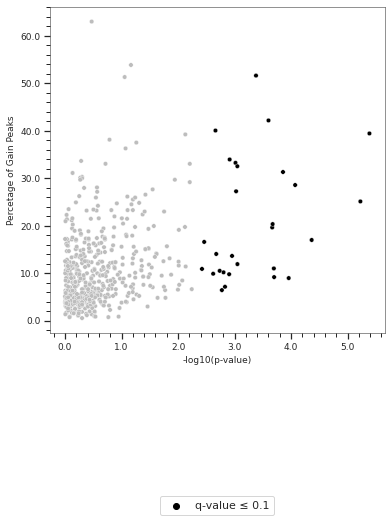

In [50]:
fig, ax = plt.subplots(figsize=(6,6))
cols={'q-value ≤ 0.1': '#000000','Other': '#bdbdbd'}
sns.scatterplot(brca_gain_tf['-log10(p-value)'],brca_gain_tf['target_per'], hue=brca_gain_tf['color'],palette=cols,ax=ax,s=20)
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles=handles[1:], labels=labels[1:],loc='upper center', bbox_to_anchor=(0.5, -0.5),fancybox=True, ncol=2,borderaxespad=0.)
ax.set_ylabel("Percetage of Gain Peaks",size=9)
ax.set_xlabel("-log10(p-value)",size=9)
ax.set_yticklabels(ax.get_yticks(), size = 9)
ax.set_xticklabels(ax.get_xticks(), size = 9)
ax.minorticks_on()
plt.savefig("plots/Figure2A.png",bbox_inches='tight',format="png")
plt.show()

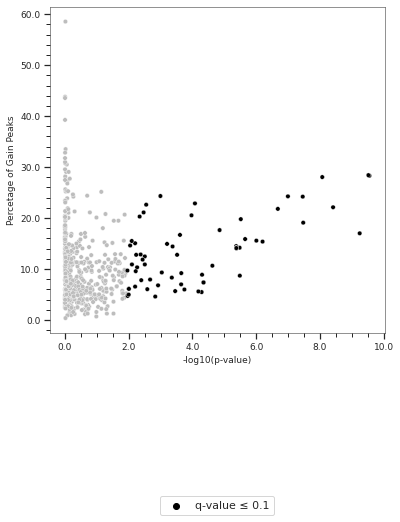

In [51]:
fig, ax = plt.subplots(figsize=(6,6))
cols={'q-value ≤ 0.1': '#000000','Other': '#bdbdbd'}
sns.scatterplot(brca_loss_tf['-log10(p-value)'],brca_loss_tf['target_per'], hue=brca_loss_tf['color'],palette=cols,ax=ax,s=20)
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles=handles[1:], labels=labels[1:],loc='upper center', bbox_to_anchor=(0.5, -0.5),fancybox=True, ncol=2,borderaxespad=0.)
ax.set_ylabel("Percetage of Gain Peaks",size=9)
ax.set_xlabel("-log10(p-value)",size=9)
ax.set_yticklabels(ax.get_yticks(), size = 9)
ax.set_xticklabels(ax.get_xticks(), size = 9)
ax.minorticks_on()
plt.savefig("plots/Figure2B.png",bbox_inches='tight',format="png")
plt.show()

## Enrichment of enhancer marks and G-quadruplex structure in the differentially accessible regions 

### G-quadruplex

In [52]:
### Non-B form structure ditribution, Downloaded from https://nonb-abcc.ncifcrf.gov/apps/site/default ###
st=pd.read_csv("data/Gquad_nonB_forms_hg38.bed",sep='\t',header=None,index_col=0)
bed=pd.DataFrame()
bed['Regions']=sig_limma['name']
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
temp.columns=['chr','start','stop']
temp['id']=sig_limma['name']


a=pybedtools.BedTool.from_dataframe(temp)
b = pybedtools.BedTool.from_dataframe(st)
found = a.intersect(b, wo=True)
found=pybedtools.BedTool.to_dataframe(found, header=None)

sig_limma['G-Quadruplex']='No'
sig_limma['G-Quadruplex'][sig_limma['name'].isin(found['name'])]='yes'

### Enhancer

In [53]:
### Enhancer intraction (Double elite status) from Genehancer, downloaded from UCSC Table browser for significant regions ###
### Download and name the file as mentioned ###

en=pd.read_csv("data/gene_enhancer_2017.bed_hg38.bed",sep='\t')
en=en[['#chrom', 'chromStart', 'chromEnd','geneName']]
bed=pd.DataFrame()
bed['Regions']=sig_limma.index
temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True))
temp.columns=['chr','start','stop']
temp['id']=sig_limma.index
temp.head()

a=pybedtools.BedTool.from_dataframe(temp)
b=pybedtools.BedTool.from_dataframe(en)
found = a.intersect(b,wo=True)
found=pybedtools.BedTool.to_dataframe(found)
found=pd.DataFrame(found.groupby('name')['thickEnd'].apply(list))
found['Ehancer']='yes'
found['name']=found.index
found.index.name=None
found.columns=['Enhancer-Gene','Enhancer','name']
sig_limma=pd.merge(sig_limma,found,on='name',how='left')

In [54]:
sig_limma.index=sig_limma['name']
sig_limma.index.name=None

## Impact of chromatin accessibility changes on gene expression

### Gene level copy number 

In [55]:
## Gene level relative copy number obtained from https://gdc.cancer.gov/about-data/publications/panimmune ###
brca_m=['TCGA-A2-A0CX','TCGA-A7-A13E','TCGA-AR-A0TP','TCGA-A2-A0SW','TCGA-C8-A137','TCGA-C8-A12O']
brca_w=['TCGA-C8-A12M','TCGA-A7-A0CH','TCGA-AO-A12F','TCGA-BH-A0DV','TCGA-A2-A0T5']

sel_cna=pd.read_csv('data/Gene_Copy_number.tsv',sep='\t',index_col=0)
temp1=pd.DataFrame(index=sel_cna.index)
temp1['Hotspot_cna']=sel_cna[brca_m].median(axis=1)
temp1['Wild_cna']=sel_cna[brca_w].median(axis=1)
temp1['Cancer']='BRCA'
t=temp1
t['Gene Name']=t.index
sig_limma=pd.merge(sig_limma,t,on=['Gene Name','Cancer'], how='left')
sig_limma.index=sig_limma['name']
sig_limma.index.name=None



#### Log2FC(RSEM+0.001) of linked genes; Mutant vs Wild

In [56]:
### TCGA Gene level Log2FC(RSEM+0.001) values ###

final_exp=pd.read_csv("data/Atac_seq_exp_W&H.tsv",sep="\t",index_col=0)

temp1=pd.DataFrame(index=final_exp.index)
temp1['Hot_median_atac']=final_exp[brca_m].median(axis=1)
temp1['Wild_median_atac']=final_exp[brca_w].median(axis=1)

temp1['L2FC_median_atac']=(np.log2(final_exp[brca_m].median(axis=1)/final_exp[brca_w].median(axis=1)))
temp1['Cancer']='BRCA'

t=temp1
t['Gene Name']=t.index
sig_limma=pd.merge(sig_limma,t[['Gene Name','Cancer','Hot_median_atac','Wild_median_atac','L2FC_median_atac']],on=['Gene Name','Cancer'], how='left')
sig_limma.index=sig_limma['name']
sig_limma.index.name=None


#### TCGABiolinks expression 

In [57]:
cl={'None':'#bdbdbd','Other':'#31a354','Known Up':'#f03b20','Known Down':'#756bb1', 'Cancer':'#c51b8a'}


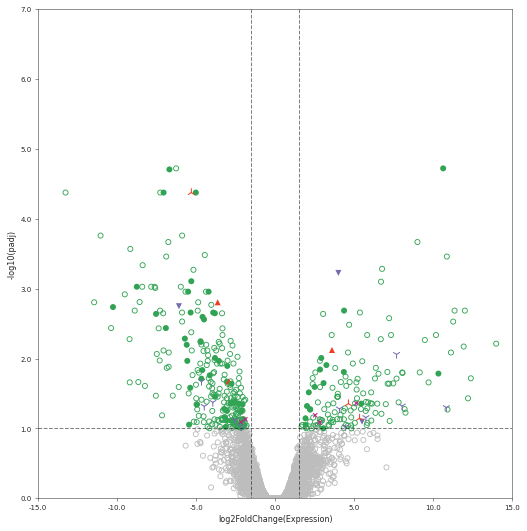

In [58]:
### Differential Expression Plot from 3_Differential_exp.ipynb ###
sns.set(font="Arial")
plt.rcParams["lines.markeredgewidth"] = 1
sns.set(style="ticks", rc={"axes.linewidth": 0.5})
fig, ax = plt.subplots(figsize=(8.5, 9))
br=pd.read_csv("Results/BRCA_DEG_HW_raw.tsv",sep='\t',index_col=0)
br['-log10(padj)']=-np.log10(br['FDR'])
br['Type']="Other"
br['Type'][br['mRNA'].isin(cancer)]='Cancer'
br['Type'][br['mRNA'].isin(mut_down)]='Known Down'
br['Type'][br['mRNA'].isin(mut_up)]='Known Up'
br['Type'][((br['logFC']<=1)|(br['logFC']>= -1))&(br['FDR']>0.1)]="None"
br['Atac']='No'
br['Atac'][(br['FDR']<0.1)&(br['logFC']>1)&(br['mRNA'].isin(sig_limma['Gene Name'][sig_limma['log2FoldChange']>1]))]='yes'
br['Atac'][(br['FDR']<0.1)&(br['logFC']< -1)&(br['mRNA'].isin(sig_limma['Gene Name'][sig_limma['log2FoldChange']< -1]))]='yes'
br['size']=30
br['size'][br['Type']=='Known Down']=40
br['size'][br['Type']=='Known Up']=40
br['size'][br['Type']=='Cancer']=20
sns.set_style("white")
grid=sns.scatterplot(x="logFC", y="-log10(padj)", hue='Type',palette=cl,style="Type" ,hue_order =['Known Up','Known Down','Cancer','Other',"None"],markers={'None':open_circle,'Other': open_circle} ,data=br[(br['Atac']=='No')&(br['Type'].isin(['None','Other']))], alpha=1,linewidth=0,ax=ax)
grid=sns.scatterplot(x="logFC", y="-log10(padj)", hue='Type',palette=cl,style="Type" ,hue_order =['Known Down','Cancer','Other',"None"],markers={'None':"o",'Other': "o",'Known Down':'v','Known Up':'^','Cancer':'X'},data=br[br['Atac']=='yes'], alpha=1,linewidth=0,ax=ax)
grid=sns.scatterplot(x="logFC", y="-log10(padj)", hue='Type',palette=cl,style="Type" ,hue_order =['Known Up','Known Down','Cancer','Other',"None"],markers={'None':"None",'Other': "None",'Known Down':'1','Known Up':'2','Cancer':'x'} ,data=br[br['Atac']=='No'], alpha=1,linewidth=1,ax=ax,size="size")
plt.plot([-1.5, -1.5], [7., 0], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
plt.plot([1.5, 1.5], [7., 0], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
plt.plot([-15, 15], [1, 1], linewidth=1,color='black',alpha=0.5,linestyle="dashed")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, ncol=5,borderaxespad=0.,prop={'size': 8})
ax.get_legend().remove()
ax.set(xlim=(-15, 15))
ax.set(ylim=(0, 7))
ax.set_ylabel("-log10(padj)",size = 8)
ax.set_xlabel("log2FoldChange(Expression)",size = 8)
ax.set_yticklabels(ax.get_yticks(), size = 7)
ax.set_xticklabels(ax.get_xticks(), size = 7)
ax.xaxis.set_tick_params(width=0.5,size=3)
ax.yaxis.set_tick_params(width=0.5,size=3)
top5=['DAPK1','SLC36A4','TTYH1','JAKMIP1','ME1','BMPR1B','LONRF2','KCNE4','ROBPO2','TBC1D9']
#text=[]
#for (x,y,label) in np.array(br[['logFC','-log10(padj)','mRNA']][br['mRNA'].isin(top5)]):
#    text.append(plt.text(x,y,label,zorder=8,size=8))
#adjust_text(text, arrowprops=dict(arrowstyle='->', color='red',lw=0.5))

plt.savefig("plots/Figure4A.png",bbox_inches='tight',format="png",dpi=500.0,transparent=True)


### Histone and Enhancer overlap in mutant cell lines

In [59]:
### Histone data for mutant cell lines currated from ChipAtlas ###
brca_his=pd.read_csv("data/BRCA_histone.tsv",sep='\t')

In [60]:
cols=['#addd8e','#41b6c4','#f768a1','#fed976','#d95f0e','#8c96c6','#d4b9da']

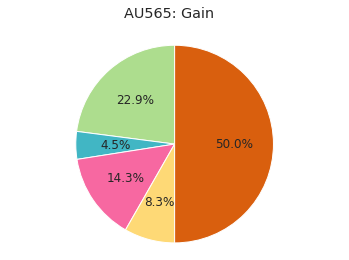

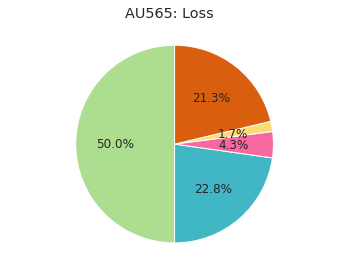

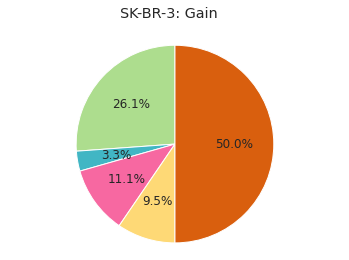

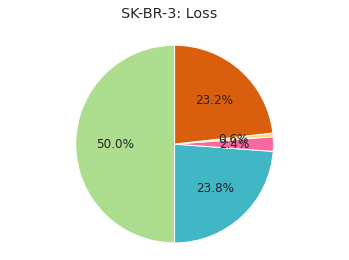

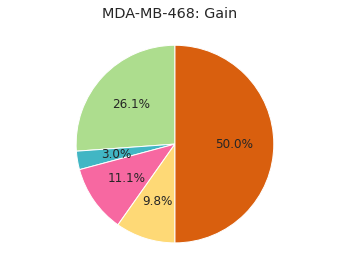

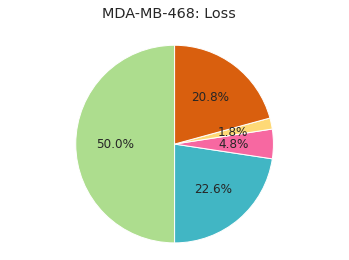

In [61]:
his=['H3K27ac']
dt=pd.DataFrame(index=['With_Gain','Without_Gain','With_Loss','Without_Loss'],columns=['Enhancer','Mark','Dnase','E&M','E&M&D','E&D','None'])
celline=['AU565', 'SK-BR-3', 'MDA-MB-468']
for h in his:
    for c in celline:
        temp=sig_limma[(sig_limma['Cancer']=='BRCA')&(sig_limma['Copy_number']=='no')]
        temp=temp.fillna(0)
        dt1=pd.DataFrame(index=temp.index)
        dt1['Enhancer']=temp['Enhancer']
        dt1['Enhancer']=dt1['Enhancer'].replace(0,'no')
        dt1['Region']=temp['Region']
        dt1['Mark']='no'
        dt1['Mark'][dt1.index.isin(brca_his['ID'][(brca_his['blockSizes']==h)&(brca_his['itemRgb']==c)])]='yes'
        dt1[c]='no'
        dt1['Denovo']=temp['Denovo']
        dt1['Cancer']=temp['Cancer']

        dt.loc['With_Gain','Enhancer']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index)
        dt.loc['With_Loss','Enhancer']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index)
        
        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_BRCA_Gain_enhancer.bed',header=None,index=False,sep='\t')
        
        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_BRCA_Loss_enhancer.bed',header=None,index=False,sep='\t')

        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Mark']=='yes')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_BRCA_Loss_histone.bed',header=None,index=False,sep='\t')

        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Mark']=='yes')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_BRCA_Gain_histone.bed',header=None,index=False,sep='\t')

        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_BRCA_Gain_None.bed',header=None,index=False,sep='\t')

        bed=pd.DataFrame()
        bed['Regions']=dt1[(dt1['Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index
        temp=pd.DataFrame(bed['Regions'].str.split(":",3, expand=True),)
        temp.to_csv('profile/histone/'+c+'_BRCA_Loss_None.bed',header=None,index=False,sep='\t')
        
        dt.loc['With_Gain','Mark']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Mark']=='yes')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index)
        dt.loc['With_Loss','Mark']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Mark']=='yes')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index)
        
        dt.loc['With_Gain','E&M']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Mark']=='yes')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index)
        dt.loc['With_Loss','E&M']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Mark']=='yes')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index)
        
        dt.loc['Without_Gain','Enhancer']=len(dt1[(dt1['Denovo']=='no')&(dt1['Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index)
        dt.loc['Without_Loss','Enhancer']=len(dt1[(dt1['Denovo']=='no')&(dt1['Mark']=='no')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index)
        
        dt.loc['Without_Gain','Mark']=len(dt1[(dt1['Denovo']=='no')&(dt1['Mark']=='yes')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index)
        dt.loc['Without_Loss','Mark']=len(dt1[(dt1['Denovo']=='no')&(dt1['Mark']=='yes')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index)
        
        dt.loc['Without_Gain','E&M']=len(dt1[(dt1['Denovo']=='no')&(dt1['Mark']=='yes')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index)
        dt.loc['Without_Loss','E&M']=len(dt1[(dt1['Denovo']=='no')&(dt1['Mark']=='yes')&(dt1['Enhancer']=='yes')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index)
            

        dt.loc['Without_Gain','None']=len(dt1[(dt1['Denovo']=='no')&(dt1['Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index)
        dt.loc['Without_Loss','None']=len(dt1[(dt1['Denovo']=='no')&(dt1['Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index)

        dt.loc['With_Gain','None']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Gain')&(dt1['Cancer']=='BRCA')].index)
        dt.loc['With_Loss','None']=len(dt1[(dt1['Denovo']=='yes')&(dt1['Mark']=='no')&(dt1['Enhancer']=='no')&(dt1[c]=='no')&(dt1['Region']=='Loss')&(dt1['Cancer']=='BRCA')].index)

        l=['Enhancer','Mark','E&M','None','Rest']
        v=list(dt[:2][['Enhancer','Mark','E&M','None']].sum())
        v.append(828)
        fig1, ax1 = plt.subplots()
        ax1.pie(v, labels=l,startangle=90,colors=cols,autopct='%1.1f%%',labeldistance=None)
        ax1.axis('equal')
        fig1.suptitle(c+': Gain')
        plt.savefig("plots/Figure3A_Gain"+c+"_"+h+".svg",bbox_inches='tight',format="svg")
        plt.show()
        
        l=['Rest','None','E&M','Mark','Enhancer']
        v=[995]
        v.extend(list(dt[2:][['None','E&M','Mark','Enhancer']].sum()))
        
        fig1, ax1 = plt.subplots()
        ax1.pie(v, labels=l,startangle=90,colors=cols,autopct='%1.1f%%',labeldistance=None)
        ax1.axis('equal')
        fig1.suptitle(c+': Loss')
        plt.savefig("plots/Figure3A_Loss"+c+"_"+h+".svg",bbox_inches='tight',format="svg")
        plt.show()
        

In [62]:
### Final result file
sig_limma.to_csv("Results/BRCA_Result.tsv",sep='\t')

In [63]:
### Percentage of columns in gain and loss
for cl in ['Annotation', 'Type-gene', 'Enhancer', 'P53', 'Chip', 'Copy_number', 'G-Quadruplex']:
    for c in ['BRCA']:
        print ("--------------------------------------------------------------------------")
        print(c+" Gain "+ cl) 
        print(sig_limma[cl][(sig_limma['log2FoldChange']>1)&(sig_limma['Cancer']==c)].value_counts(normalize=True))
        print("\n"+c+" Loss "+ cl)
        print(sig_limma[cl][(sig_limma['log2FoldChange']< -1)&(sig_limma['Cancer']==c)].value_counts(normalize=True))
        print ("-------------------------------------------------------------------------- \n")

--------------------------------------------------------------------------
BRCA Gain Annotation
intron          0.568089
Intergenic      0.285569
promoter-TSS    0.059959
exon            0.027439
TTS             0.023374
non-coding      0.020325
3' UTR          0.013211
5' UTR          0.002033
Name: Annotation, dtype: float64

BRCA Loss Annotation
intron          0.419030
Intergenic      0.413359
promoter-TSS    0.099559
exon            0.026465
TTS             0.012602
non-coding      0.011972
3' UTR          0.010712
5' UTR          0.006301
Name: Annotation, dtype: float64
-------------------------------------------------------------------------- 

--------------------------------------------------------------------------
BRCA Gain Type-gene
Other         0.943089
Cancer        0.033537
Known Down    0.014228
Known Up      0.009146
Name: Type-gene, dtype: float64

BRCA Loss Type-gene
Other         0.936358
Cancer        0.024575
Known Down    0.023314
Known Up      0.015753
Name: T